In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

In [3]:
# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

In [4]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)


In [5]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

In [6]:
# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [7]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 2ms/step - loss: 0.0928 - val_loss: 0.0248
Epoch 2/200
760/760 [==============================] - 1s 927us/step - loss: 0.0314 - val_loss: 0.0179
Epoch 3/200
760/760 [==============================] - 1s 903us/step - loss: 0.0255 - val_loss: 0.0132
Epoch 4/200
760/760 [==============================] - 1s 904us/step - loss: 0.0180 - val_loss: 0.0097
Epoch 5/200
760/760 [==============================] - 1s 892us/step - loss: 0.0155 - val_loss: 0.0063
Epoch 6/200
760/760 [==============================] - 1s 893us/step - loss: 0.0123 - val_loss: 0.0035
Epoch 7/200
760/760 [==============================] - 1s 935us/step - loss: 0.0099 - val_loss: 0.0018
Epoch 8/200
760/760 [==============================] - 1s 898us/step - loss: 0.0085 - val_loss: 0.0015
Epoch 9/200
760/760 [================

760/760 [==============================] - 1s 908us/step - loss: 0.0026 - val_loss: 5.0378e-05
Epoch 73/200
760/760 [==============================] - 1s 904us/step - loss: 0.0032 - val_loss: 4.1010e-05
Epoch 74/200
760/760 [==============================] - 1s 904us/step - loss: 0.0028 - val_loss: 1.3088e-04
Epoch 75/200
760/760 [==============================] - 1s 908us/step - loss: 0.0029 - val_loss: 5.1786e-05
Epoch 76/200
760/760 [==============================] - 1s 932us/step - loss: 0.0026 - val_loss: 2.5567e-05
Epoch 77/200
760/760 [==============================] - 1s 895us/step - loss: 0.0032 - val_loss: 8.0823e-05
Epoch 78/200
760/760 [==============================] - 1s 897us/step - loss: 0.0030 - val_loss: 6.8712e-04
Epoch 79/200
760/760 [==============================] - 1s 901us/step - loss: 0.0028 - val_loss: 6.7037e-05
Epoch 80/200
760/760 [==============================] - 1s 911us/step - loss: 0.0024 - val_loss: 4.7484e-05
Epoch 81/200
760/760 [===================

760/760 [==============================] - 1s 918us/step - loss: 0.0018 - val_loss: 5.1067e-05
Epoch 148/200
760/760 [==============================] - 1s 890us/step - loss: 0.0017 - val_loss: 7.3993e-05
Epoch 149/200
760/760 [==============================] - 1s 890us/step - loss: 0.0018 - val_loss: 7.4396e-05
Epoch 150/200
760/760 [==============================] - 1s 933us/step - loss: 0.0019 - val_loss: 2.4147e-04
Epoch 151/200
760/760 [==============================] - 1s 928us/step - loss: 0.0020 - val_loss: 3.8174e-05
Epoch 152/200
760/760 [==============================] - 1s 893us/step - loss: 0.0021 - val_loss: 4.3650e-05
Epoch 153/200
760/760 [==============================] - 1s 899us/step - loss: 0.0020 - val_loss: 1.3566e-05
Epoch 154/200
760/760 [==============================] - 1s 888us/step - loss: 0.0020 - val_loss: 1.1618e-04
Epoch 155/200
760/760 [==============================] - 1s 901us/step - loss: 0.0019 - val_loss: 1.7072e-05
Epoch 156/200
760/760 [==========

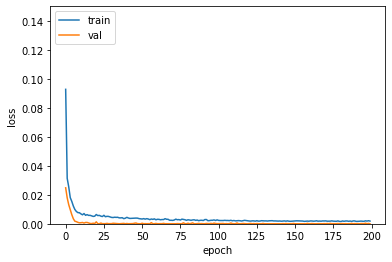

In [13]:
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  1.4429674248324438e-05
Validataion Score:  1.4772590253010599e-05
Test Score:  1.4772590253010599e-05


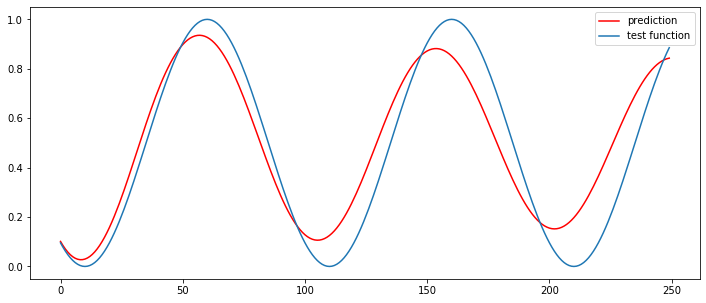

In [15]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()